In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<b>Bước đầu xử lí với dataset này, ta nhận thấy cột Id không mang thông tin liên quan đến giá trị của cột sale price nên ta sẽ bỏ cột này đi<b>   

In [3]:
data.drop(["Id"], axis = 1, inplace = True)

<b>Tiếp theo là xem các cột có giá trị thuộc loại nào<b>   

In [4]:
print(data.dtypes)

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object


<b>Từ đây ta nhận thấy có các cột thuộc kiểu string và numeric xen kẽ lẫn nhau, ta cần phải lọc chúng ra<b>   

In [5]:
#lọc ra các cột số
numerical_column = data.select_dtypes(exclude = object).columns.tolist()[:-1]

#Lọc ra các cột chữ
string_column = data.select_dtypes(include='object').columns.tolist()
print(numerical_column)
print()
print(string_column)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCo

<b>Kiểm tra xem trong các cột có hàng nào không chứa giá trị "NaN" không<b>

In [6]:
for column in data.columns:
    if data[column].isna().any():
        print(f"{column} ({data[column].dtype}) : {data[column].isna().any()}" )

LotFrontage (float64) : True
Alley (object) : True
MasVnrType (object) : True
MasVnrArea (float64) : True
BsmtQual (object) : True
BsmtCond (object) : True
BsmtExposure (object) : True
BsmtFinType1 (object) : True
BsmtFinType2 (object) : True
Electrical (object) : True
FireplaceQu (object) : True
GarageType (object) : True
GarageYrBlt (float64) : True
GarageFinish (object) : True
GarageQual (object) : True
GarageCond (object) : True
PoolQC (object) : True
Fence (object) : True
MiscFeature (object) : True


<b>Xử lí các giá trị NaN</b>
<p>Với kiểu dữ liệu numeric thì thay thế các giá trị NaN bằng mean của các giá trị còn lại.</p>
Làm như vậy để những giữ nguyên được những dữ liệu liên quan đến các cột khác đồng thời không thay đổi giá trị trung bình của cột chứa giá trị NaN

In [7]:
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    column_type = data[column].dtype
    if column_type == 'object':  
                data[column] = LabelEncoder().fit_transform(data[column])
    elif column_type == 'int64' or column_type == 'float64':
            data[column] = data[column].fillna(data[column].mean())
            
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,3,4,4,0,4,2010,8,4,142125


<b>Tạo hàm để visualize các mối quan hệ giữa feature numeric với target</b>

In [8]:
def create_scatterplot(x_axis, column_name):
    
    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot
    
        sns.scatterplot(x = x_axis, y = col, data = data)
        
        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string

    # 3- set layout between two plots
    plt.tight_layout(pad = 0.001)

    plt.show()

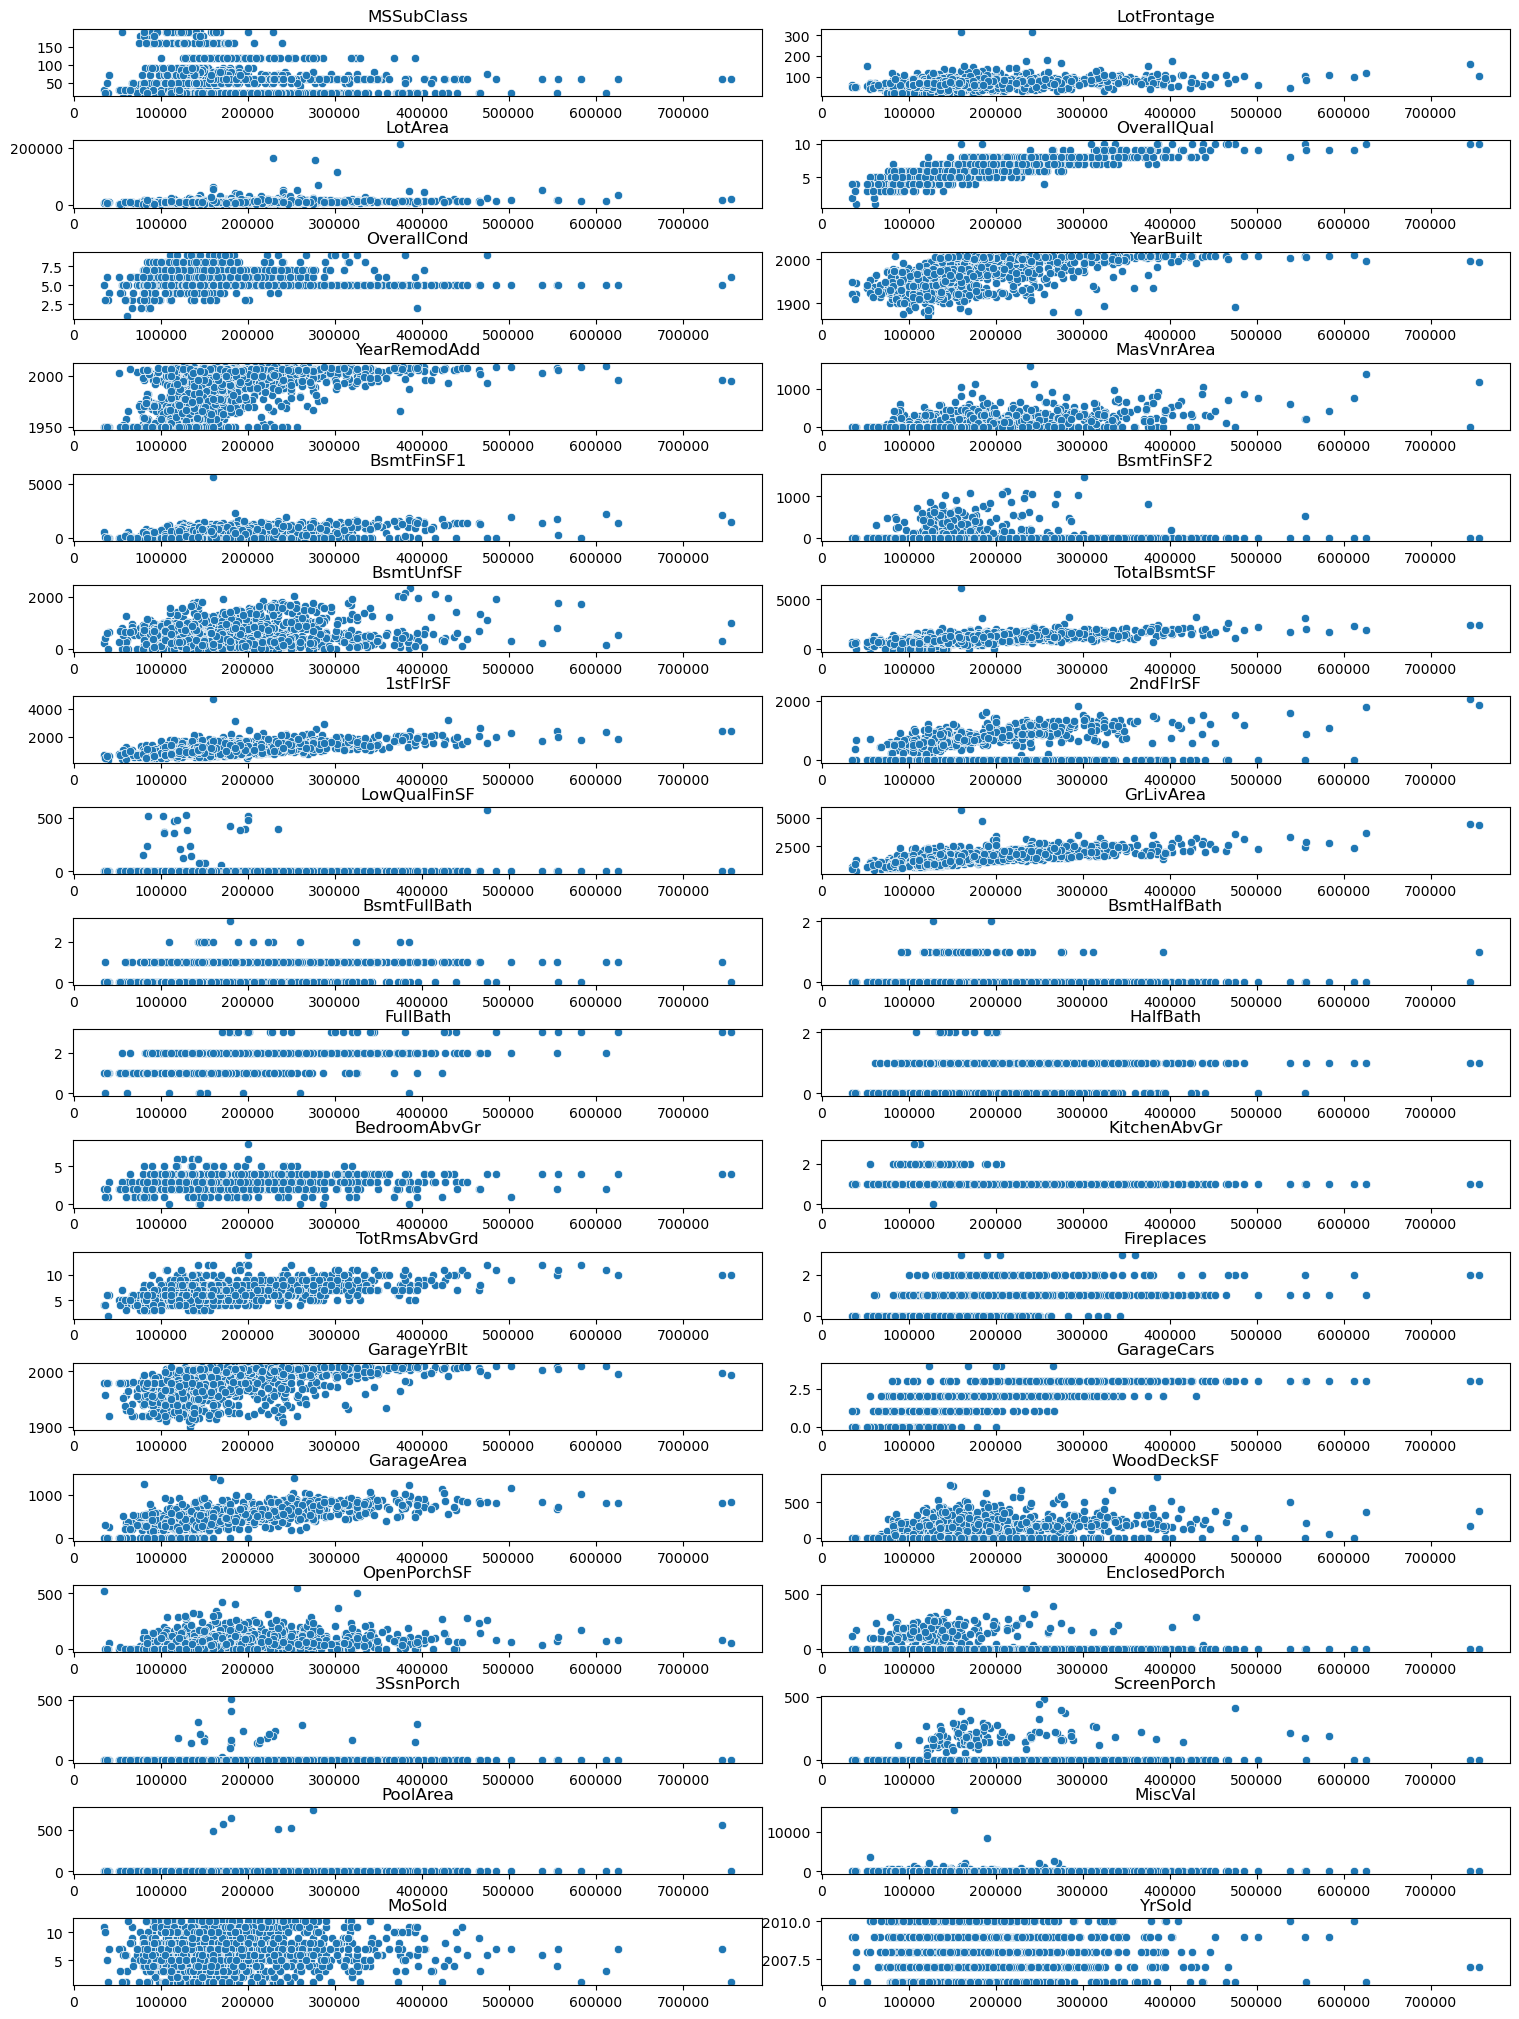

In [9]:
create_scatterplot("SalePrice", numerical_column)

<b>Ở trên có nhiều quá thông tin và khó phân tích nên chuyển sang tính correlation</b>
<p>Vì giá trị correlation âm hay dương đều ảnh hướng lớn đến kết quả đầu ra nên mình lấy cả giá trị tuyệt đối</p>

In [10]:
corr_list = []
for column in numerical_column:
    correlation = data[column].corr(data['SalePrice'])
    corr_list.append(abs(correlation))

<b>Plot để hình dung ra mối quan hệ giữa các feature và target</b>

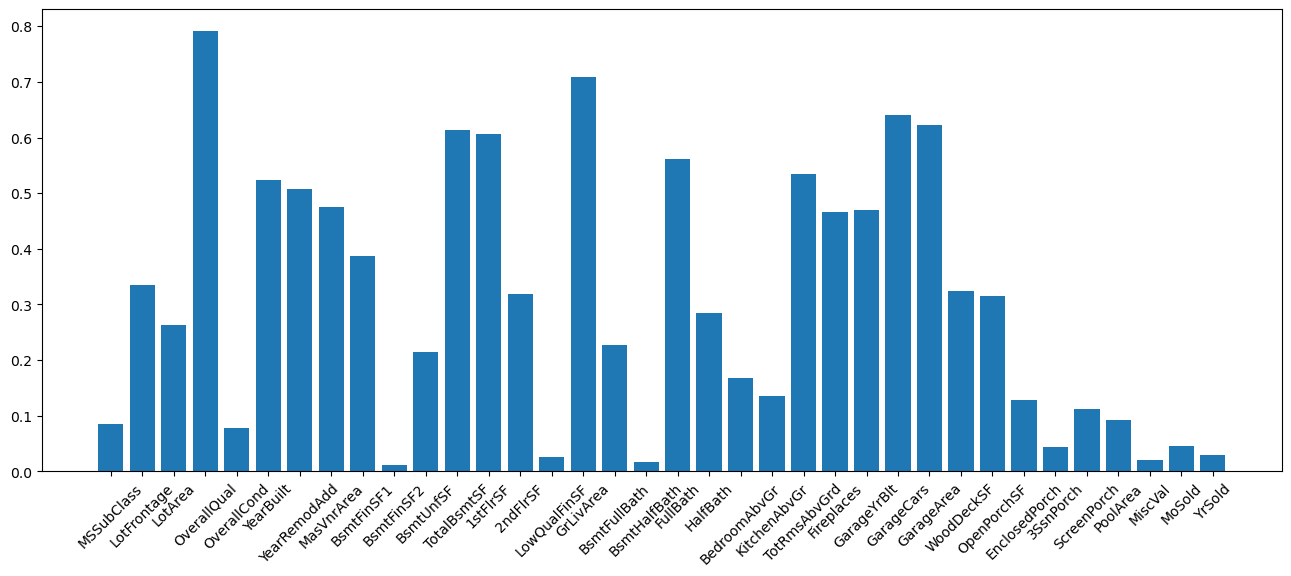

In [11]:
fig, ax = plt.subplots(figsize = (16,6))
plt.bar(numerical_column, corr_list)
plt.xticks(rotation=45)
plt.show()

<b>Từ những correlation trên, ta chỉ lấy những cái đủ lớn để ảnh hưởng đến model linear regression, ở đây mình lấy 0.6, mọi người có thể thay đổi tùy thích </b>

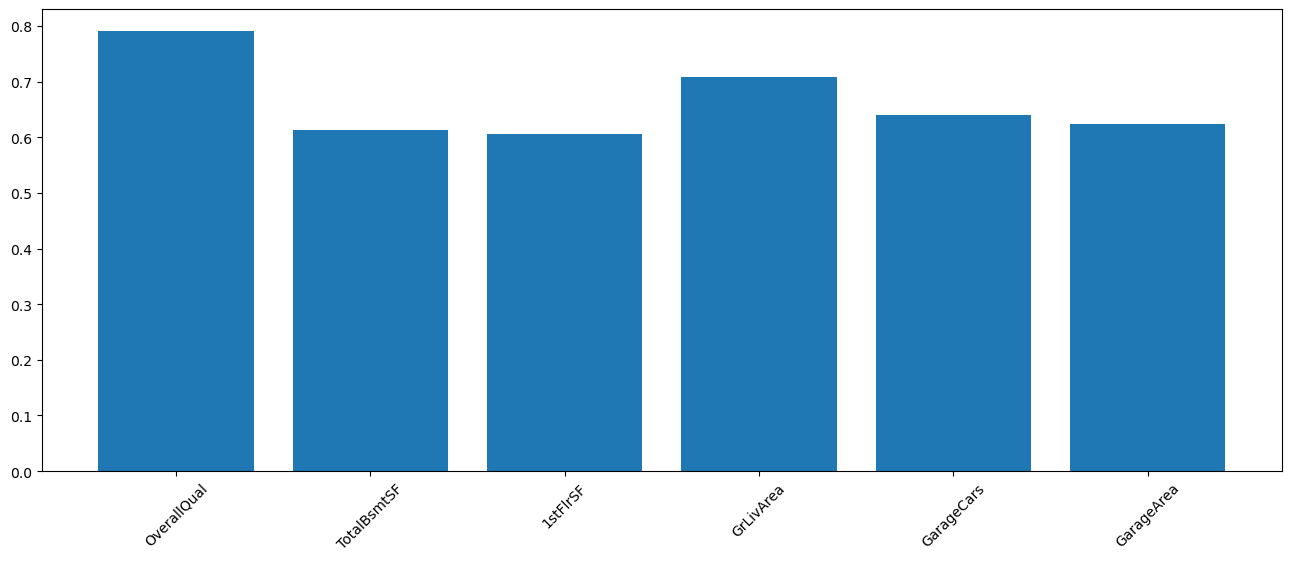

In [12]:
corr_rate = 0.6 # 0.6 nghĩa là feature với target liên kết chặt chẽ với nhau đến 60%

filtered_numerical_column = [num for num, corr in zip(numerical_column, corr_list) if corr > corr_rate]
filtered_corr_list = [corr for corr in corr_list if corr > corr_rate]
fig, ax = plt.subplots(figsize = (16,6))
plt.bar(filtered_numerical_column, filtered_corr_list)
plt.xticks(rotation=45)
plt.show()

<b>Visualize lại để kiểm chứng xem có thật sự chúng có dạng linear không</b>

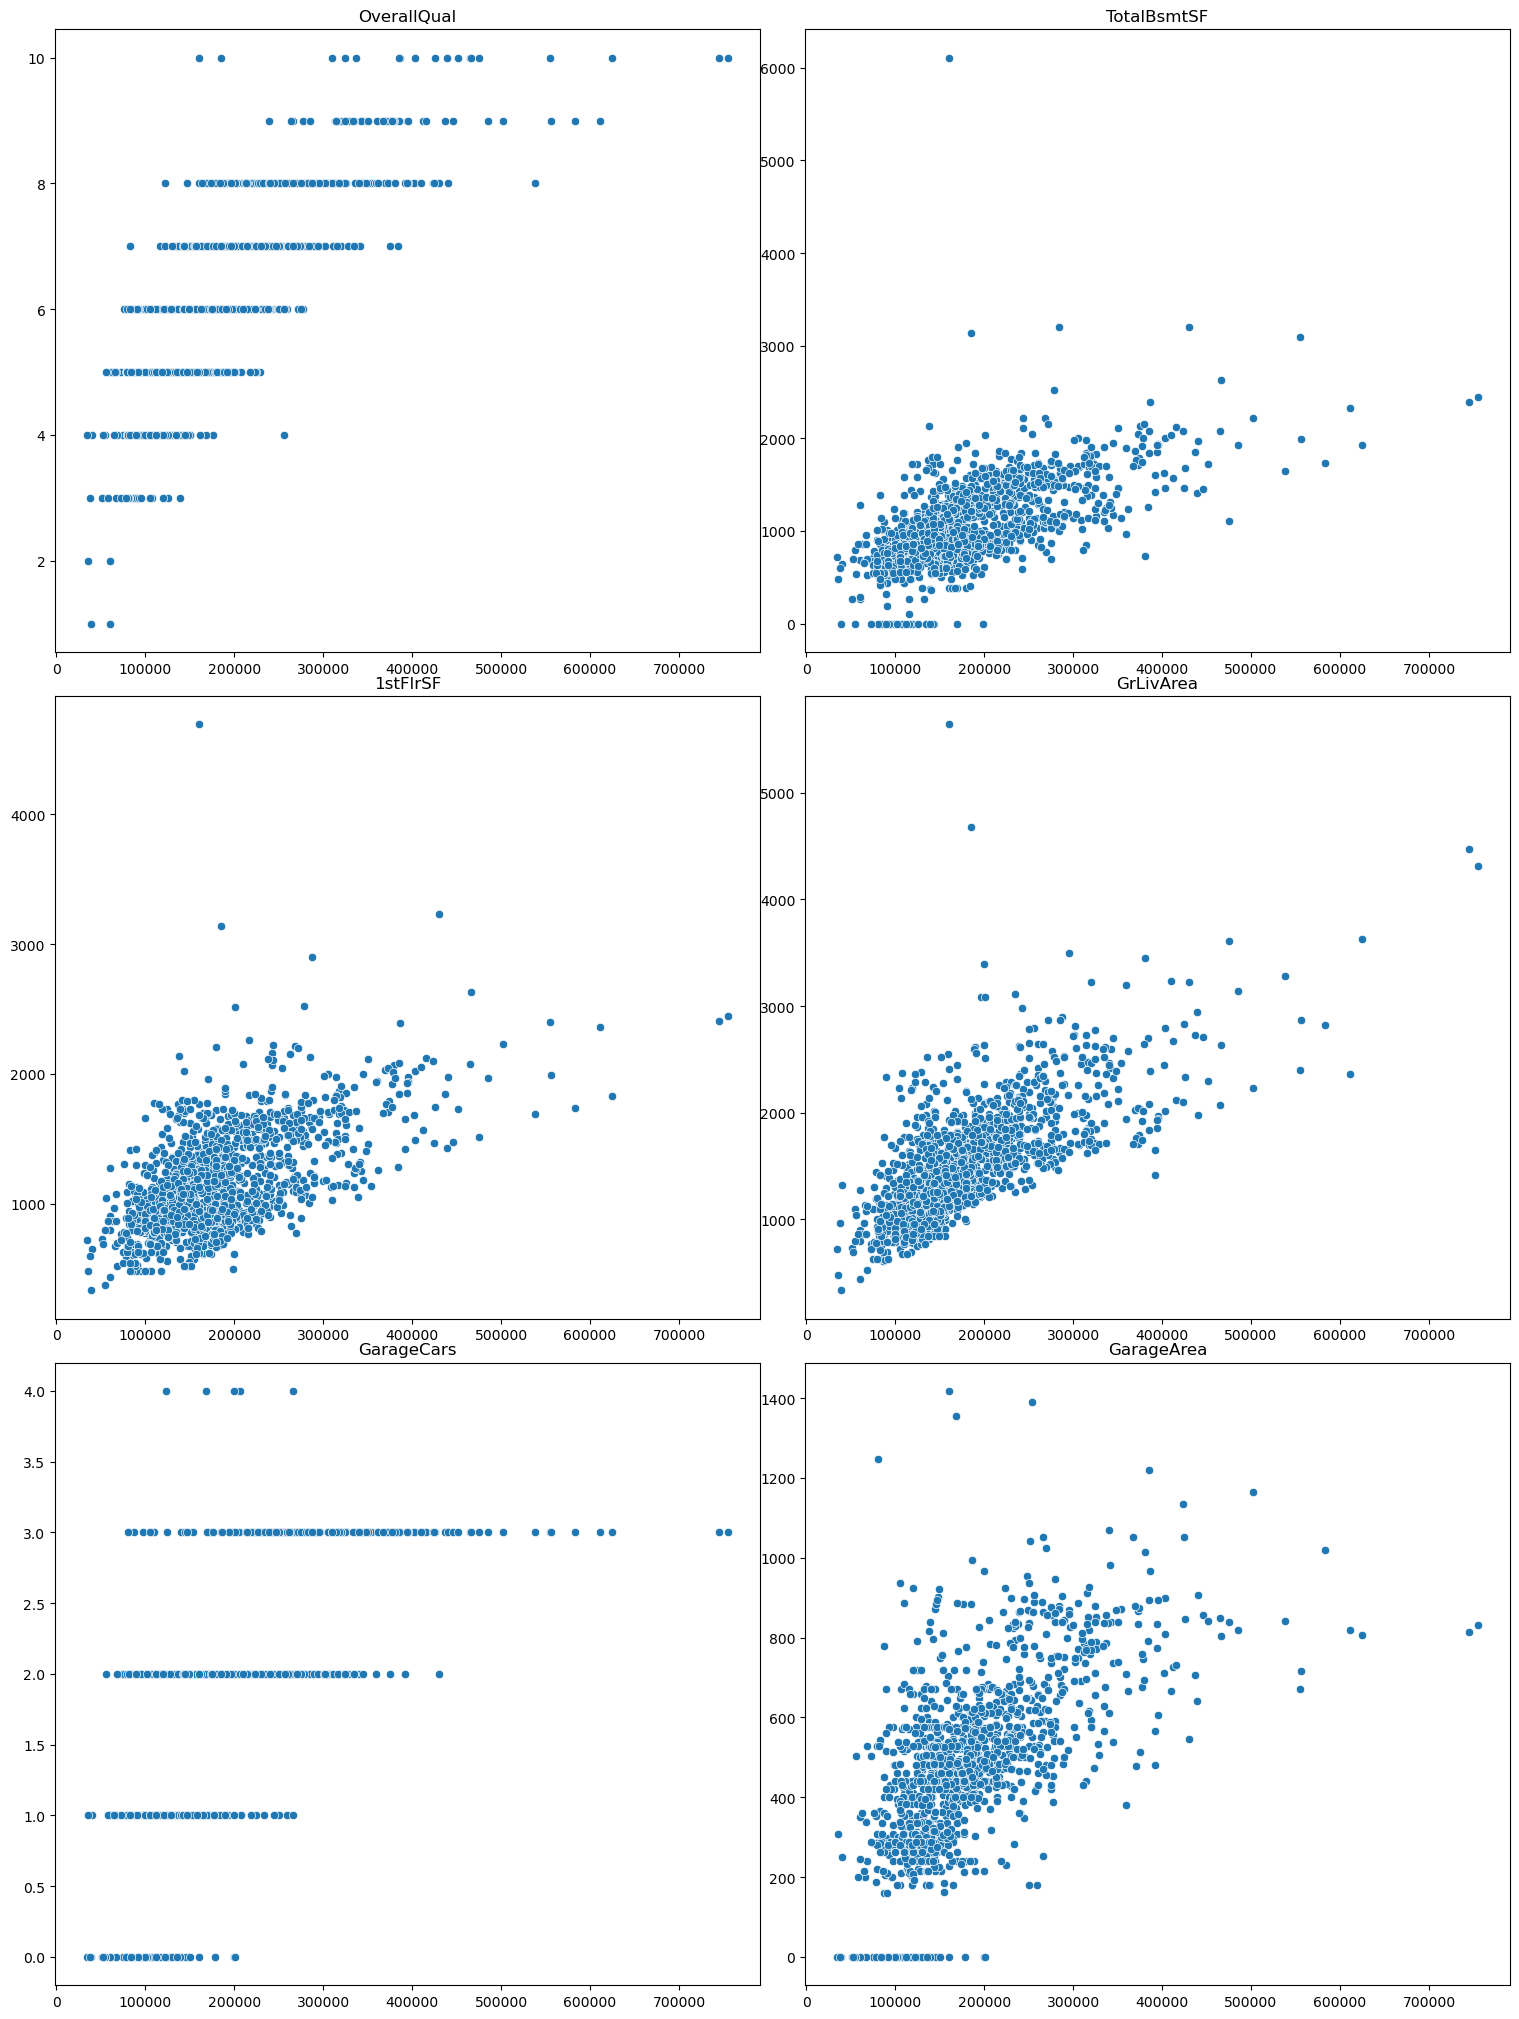

In [13]:
create_scatterplot("SalePrice", filtered_numerical_column)

<b>Vì những đồ thị trên đều có dạng linear nên ta lọc những cột không quá quan trọng và có khả năng gây nhiễu đến kết quả dự đoán của model</b>

In [14]:
filtered_out_numerical_column = [num for num in numerical_column if num not in filtered_numerical_column]

data = data.drop(filtered_out_numerical_column, axis = 1)


<b>Từ chỗ này làm tương tự như bên numeric feature, mình kiểm tra các cột string</b>

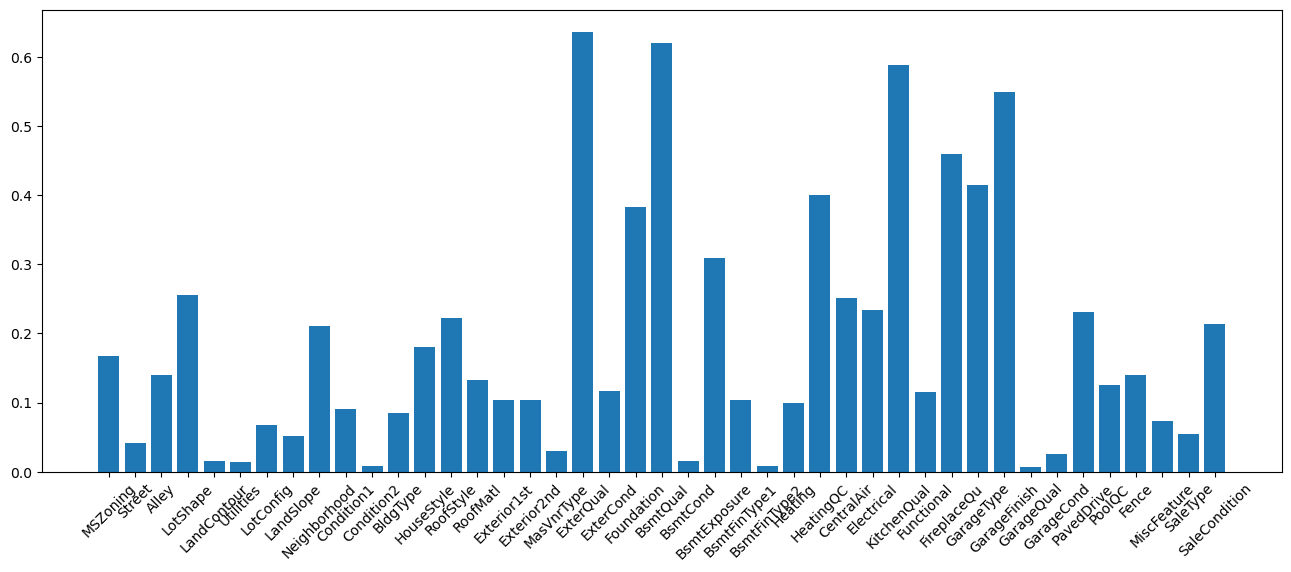

In [15]:
corr_list = []
corr_rate = 0.6

for column in string_column:
    correlation = data[column].corr(data['SalePrice'])
    corr_list.append(abs(correlation))


fig, ax = plt.subplots(figsize = (16,6))
plt.bar(string_column, corr_list)
plt.xticks(rotation=45)
plt.show()

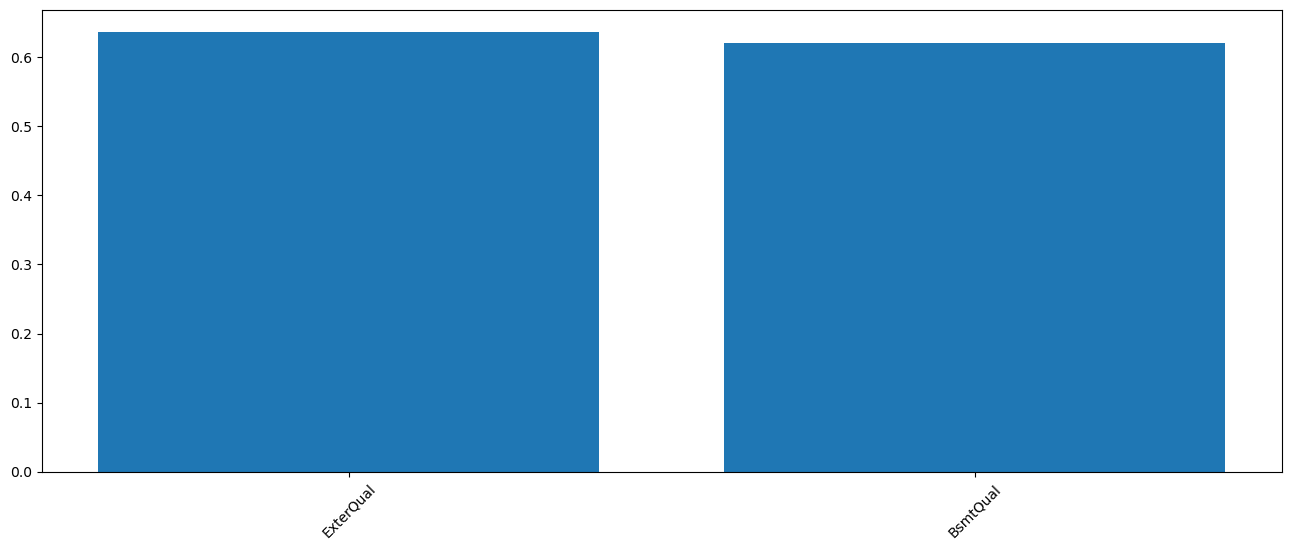

In [16]:
filtered_string_column = [num for num, corr in zip(string_column, corr_list) if corr > corr_rate]
filtered_corr_list = [corr for corr in corr_list if corr > corr_rate]

fig, ax = plt.subplots(figsize = (16,6))
plt.bar(filtered_string_column, filtered_corr_list)
plt.xticks(rotation=45)
plt.show()

In [17]:
filtered_out_string_column = [num for num in string_column if num not in filtered_string_column]

data = data.drop(filtered_out_string_column, axis = 1)

<b>Kiểm tra lại dữ liệu của data sau khi lọc</b>

In [20]:
data

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,2,2,856,856,1710,2,548,208500
1,6,3,2,1262,1262,1262,2,460,181500
2,7,2,2,920,920,1786,2,608,223500
3,7,3,3,756,961,1717,3,642,140000
4,8,2,2,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...
1455,6,3,2,953,953,1647,2,460,175000
1456,6,3,2,1542,2073,2073,2,500,210000
1457,7,0,3,1152,1188,2340,1,252,266500
1458,5,3,3,1078,1078,1078,1,240,142125


<b>Test thử model</b>

In [28]:
from sklearn.model_selection import train_test_split 

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = np.insert(X_train.to_numpy(), 0, 1, axis=1)
y_train = y_train.to_numpy()

theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred = X_train @ theta

print(np.mean(np.abs(y_train - y_pred)))

23329.236469970438
